### Life expectancy

In [123]:
#import libraries for data manipulation

import pandas as pd
import numpy as np

#import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
#open csv file
gdp_data = pd.read_csv('all_data.csv')

#preview first rows
print(gdp_data.head())

#preview last rows
gdp_data.tail()

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


,Country,Year,Life expectancy at birth (years),GDP
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10
95,Zimbabwe,2015,60.7,1.630467e+10


In [125]:
# check data types

gdp_data.dtypes

Country                              object
Year                                  int64
Life expectancy at birth (years)    float64
GDP                                 float64
dtype: object

In [126]:
# display different countries

gdp_data.Country.value_counts()

Country
Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: count, dtype: int64

In [127]:
# display count of years
gdp_data.Year.value_counts()

Year
2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: count, dtype: int64

In [128]:
# look for null values

gdp_data.isna().sum()

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

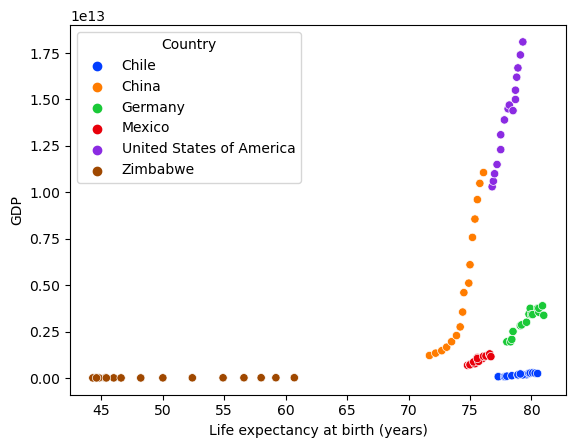

In [129]:
# plot life expectancy against GDP by country

sns.scatterplot(data=gdp_data, x='Life expectancy at birth (years)', y='GDP', hue='Country', palette='bright')
plt.show()

**In the above plot we can see that The United states is the country with higher GDP, but Chile and Germany are the countries with higer Life expectancy, followed by the United States, mexico, China and lastly Zimbabwe with a extreamly low GDP and also low Life expectancy.**

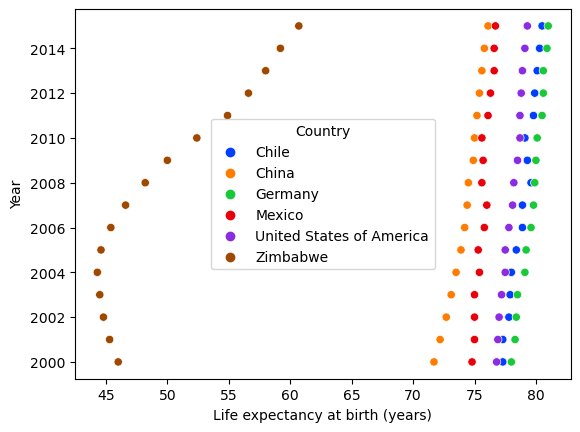

In [130]:
# plot 
sns.scatterplot(data=gdp_data, x='Life expectancy at birth (years)', y='Year', hue='Country', palette='bright')
plt.show()

**There has been an increase in Life expectancy over time in the six countries.**

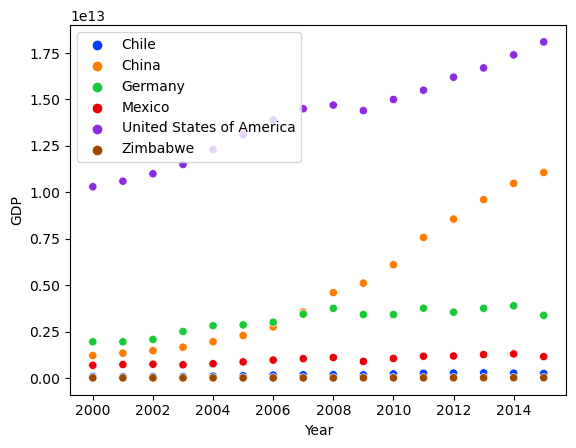

In [151]:
# examine each country individualy

sns.scatterplot(data=gdp_data, x='Year', y='GDP', hue='Country', palette='bright')
plt.legend(loc=2)
plt.show()

**We can see that GDP has been increasing for the United States and for Cina. It has been stable for Germany, but for Chile, Mexico and Zimbabwe the GDP is low and stable over the years.**

[]

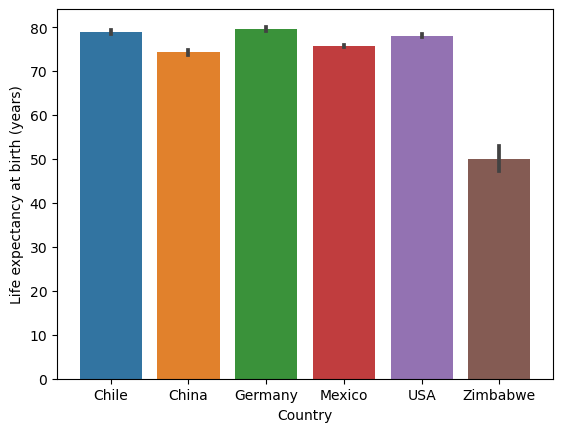

In [173]:

labels=['Chile','China','Germany','Mexico','USA','Zimbabwe']


sns.barplot(x='Country', y='Life expectancy at birth (years)', data=gdp_data)
ax=plt.subplot()
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
plt.plot()


[]

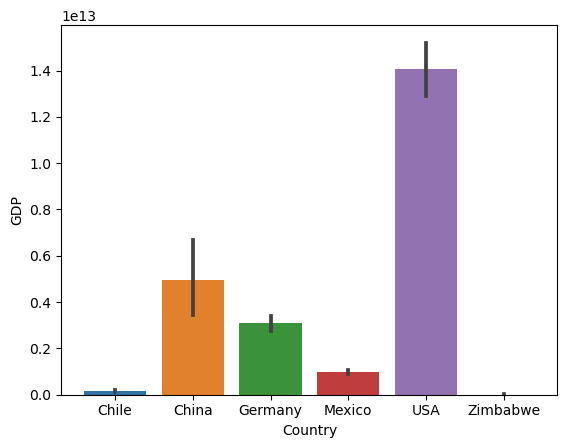

In [174]:
labels=['Chile','China','Germany','Mexico','USA','Zimbabwe']


sns.barplot(x='Country', y='GDP', data=gdp_data)
ax=plt.subplot()
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
plt.plot()

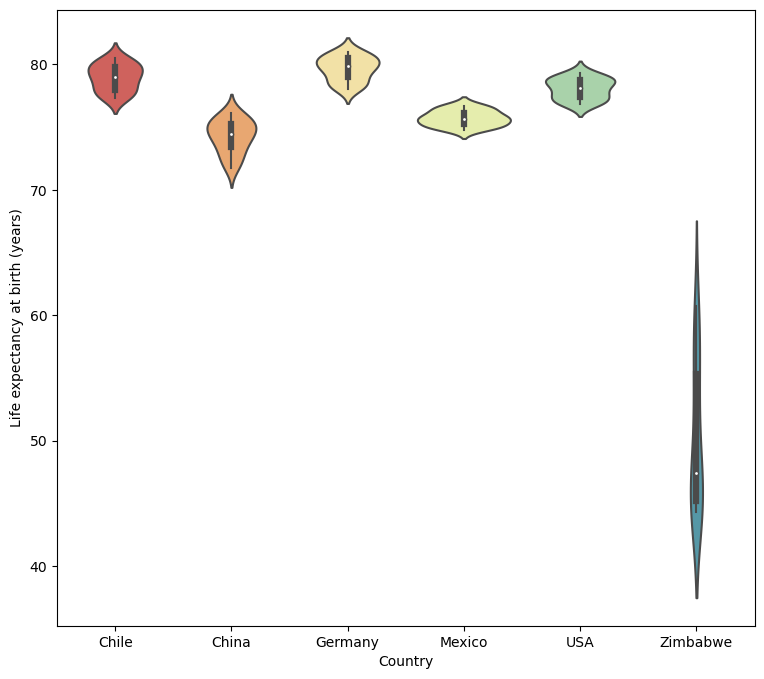

In [187]:
labels=['Chile','China','Germany','Mexico','USA','Zimbabwe']

plt.figure(figsize=(9, 8))
sns.violinplot(x='Country', y='Life expectancy at birth (years)', data=gdp_data, palette='Spectral')
ax=plt.subplot()
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
plt.show()